[CNTRSW-19855] [PRND 2.4][VANL] After reboot DCU, GS changes from D to N - ARRIVAL JIRA 
https://jira.arrival.com/browse/CNTRSW-19855

In [11]:

%load_ext autoreload
%autoreload 2
import warnings
import os
from etils import ecolab
import numpy as np
from asammdf import MDF
from pathlib import Path
import logging
from collections import  defaultdict


import  utils.can_log_utils as utls
from utils.dbc_db import DbcDb



logging.getLogger('asammdf').setLevel(logging.DEBUG)
%connect_info


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{"key":"930443a8-5e4f-45ed-89cb-3e305f69fb4d","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9030,"control_port":9031,"shell_port":9032,"stdin_port":9033,"iopub_port":9034,"kernel_name":"python3127jvsc74a57bd0e7c25480a53691149789381bdda99fb7f8d344b19173f1535ebe8bfb62cf4ee5"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing c:\Users\meleshin\AppData\Roaming\jupyter\runtime\kernel-v3a0db1d9c0ef19e134ff5dbbd39a69c30a2a5fe3e.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [ ]:
file1=r'C:\d\Downloads\CNTRSW-19855\Logging_2024-11-11_16-18-29_van_XL_gs_perr.mf4'
dbc_dir=r'dbc\ucs_dbc-0.12.0.0'

In [ ]:
mdf1 = MDF(file1)


asammdf - WARNING - Exception during attachment "C:\auto\dbc\Van_L_DBC-0.11.0.0-50\module_info.dbc" extraction: Exception('External attachment file C:\\auto\\dbc\\Van_L_DBC-0.11.0.0-50\\module_info.dbc was not found')
asammdf - WARNING - Attachment "C:\d\Downloads\CNTRSW-19855\module_info.dbc" not found
asammdf - WARNING - Exception during attachment "C:\auto\dbc\Van_L_DBC-0.11.0.0-50\module_info.dbc" extraction: Exception('External attachment file C:\\auto\\dbc\\Van_L_DBC-0.11.0.0-50\\module_info.dbc was not found')
asammdf - WARNING - Attachment "C:\d\Downloads\CNTRSW-19855\module_info.dbc" not found
asammdf - WARNING - Exception during attachment "C:\auto\dbc\Van_L_DBC-0.11.0.0-50\module_info.dbc" extraction: Exception('External attachment file C:\\auto\\dbc\\Van_L_DBC-0.11.0.0-50\\module_info.dbc was not found')
asammdf - WARNING - Attachment "C:\d\Downloads\CNTRSW-19855\module_info.dbc" not found


In [ ]:
mdf1_can_msgs = utls.mdf_get_can_msgs(mdf1,get_timestat=True,get_time=True)

In [7]:
# parse using all dbc in all channels
dbc_files=Path(dbc_dir).glob("*.dbc")
databases_all = {"CAN": [(dbc, 0) for dbc in list(Path(dbc_dir).glob("*.dbc"))]}

In [8]:
mdf1_extracted = mdf1.extract_bus_logging(database_files=databases_all)

asammdf - WARNING - Not all j1939 messages in <dbc\ucs_dbc-0.12.0.0\BodyCan1.dbc> seem to use extended addressing. Disabling global j1939 flag...
asammdf - WARNING -   VCU_CtrlDCDC with id ArbitrationId(id=882, extended=False)
asammdf - WARNING -   OBC_DC1 with id ArbitrationId(id=837, extended=False)
asammdf - WARNING -   DCDC_DC2 with id ArbitrationId(id=197, extended=False)
asammdf - WARNING - Not all j1939 messages in <dbc\ucs_dbc-0.12.0.0\DriveCan.dbc> seem to use extended addressing. Disabling global j1939 flag...
asammdf - WARNING -   VCU2EPB with id ArbitrationId(id=398, extended=False)
asammdf - WARNING -   EPB1 with id ArbitrationId(id=399, extended=False)


In [9]:
(fpath,fname)=os.path.split(file1)
(fname,fext) = os.path.splitext(fname)
fout_path=os.path.join(fpath,fname+'_extr'+fext);
mdf1_extracted.save(fout_path)

'C:\\d\\Downloads\\CNTRSW-19855\\Logging_2024-11-11_16-18-29_van_XL_gs_perr_extr.mf4'

asammdf - WARNING - Destination file "C:\d\Downloads\CNTRSW-19855\Logging_2024-11-11_16-18-29_van_XL_gs_perr_extr.mf4" already exists and "overwrite" is False. Saving MDF file as "C:\d\Downloads\CNTRSW-19855\Logging_2024-11-11_16-18-29_van_XL_gs_perr_extr.1.mf4"


WindowsPath('C:/d/Downloads/CNTRSW-19855/Logging_2024-11-11_16-18-29_van_XL_gs_perr_extr.1.mf4')

In [10]:
mdf1_msgs=defaultdict(lambda: defaultdict(list))
mdf1_msgs_grp=defaultdict(lambda: defaultdict(int))
mdf1_can_sa_msgs_grp=defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
mdf1_can_sa_msgs=defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
mdf1_can_sa_msgs_sigs_idx=defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(tuple))))
#                               can             sa                  msg                 sig

mdf1_all_signames=[list(can_signal.display_names.keys())[0] for can_signal in mdf1_extracted]

for can_signal in mdf1_extracted:
    # print(can_signal.display_names)
    can_msg_sig=list(can_signal.display_names.keys())[0]
    msg=can_msg_sig.split('.')
    m_can=msg[0]
    m_msg=msg[1]
    m_sig=msg[2]
    src=can_signal.source.name
    src_sa='NO'
    m_gr_ch_idx=(can_signal.group_index, can_signal.channel_index)
    if 'SourceAddress' in src:
        # get SA address of the sender
        if '0x' in src:
            m=src.split('0x')
            if len(m)>1:
                src_sa=m[1]
            else:
                src_sa=src
        else:
                src_sa=src
            

        # m=re.search(r'0x\w+',src)
        m=mdf1_can_sa_msgs
        # if m:
        #     src_sa=m[0]
        # else:
        #     src_sa=src
    else:
        src_sa='0x0'
    if msg[2] not in  mdf1_can_sa_msgs[msg[0]][src_sa][msg[1]]:
        mdf1_can_sa_msgs[msg[0]][src_sa][msg[1]].append(msg[2])
        
    if m_sig not in  mdf1_can_sa_msgs_sigs_idx[m_can][src_sa][m_msg]:
        mdf1_can_sa_msgs_sigs_idx[m_can][src_sa][m_msg][m_sig]=m_gr_ch_idx
        
    if msg[2] not in mdf1_msgs[msg[0]][msg[1]]:
        mdf1_msgs[msg[0]][msg[1]].append(msg[2])
    # detect multiple groups
    grp_sig_id=mdf1_extracted.channels_db[can_msg_sig]
    grp_sig_id_sum=sum(len(x) for x in grp_sig_id)
    if grp_sig_id_sum>2:
    # if mdf1_msgs_grp[msg[0]][msg[1]]:
        warnings.warn(f"group already exist for {can_signal.display_names} {grp_sig_id}. Take the first one")
        # grp_sig_id=grp_sig_id[0]
        # grp_sig_id[0];
        
    # mdf1_msgs_grp[msg[0]][msg[1]]=can_signal.group_index
    mdf1_msgs_grp[msg[0]][msg[1]]=grp_sig_id[0][0]
    mdf1_can_sa_msgs_grp[msg[0]][src_sa][msg[1]]=grp_sig_id[0][0]

# mdf1_can_sa_msgs_grp;
# mdf1_msgs_grp;
# mdf1_msgs;

C:\Users\meleshin\AppData\Local\Temp\ipykernel_35288\1398126187.py:53: UserWarning: group already exist for {'CAN2.CN.CrashChecksum': 'bus', 'CN.CrashChecksum': 'message'} ((4, 1), (447, 1), (854, 1), (1116, 1), (1587, 1)). Take the first one
  warnings.warn(f"group already exist for {can_signal.display_names} {grp_sig_id}. Take the first one")
C:\Users\meleshin\AppData\Local\Temp\ipykernel_35288\1398126187.py:53: UserWarning: group already exist for {'CAN2.CN.CrashCounter': 'bus', 'CN.CrashCounter': 'message'} ((4, 2), (447, 2), (854, 2), (1116, 2), (1587, 2)). Take the first one
  warnings.warn(f"group already exist for {can_signal.display_names} {grp_sig_id}. Take the first one")
C:\Users\meleshin\AppData\Local\Temp\ipykernel_35288\1398126187.py:53: UserWarning: group already exist for {'CAN2.CN.CrashType': 'bus', 'CN.CrashType': 'message'} ((4, 3), (447, 3), (854, 3), (1116, 3), (1587, 3)). Take the first one
  warnings.warn(f"group already exist for {can_signal.display_names} {grp

defaultdict(<function __main__.<lambda>()>,
            {'CAN3': defaultdict(int,
                         {'ACM_2': 0,
                          'ACM_1': 1,
                          'EDR_1': 2,
                          'EDR_2': 3,
                          'CN': 27,
                          'TPDT': 28,
                          'TPCMxx': 30,
                          'AC': 32,
                          'TD': 35,
                          'CCVS1': 37,
                          'BRAKE5': 442,
                          'BRAKE6': 1403,
                          'AmbientAirTemperature': 444,
                          'Gearinformation': 445,
                          'IGNsignal': 446,
                          'DTS_Status1': 471,
                          'DTS_Status2': 472,
                          'DTS_Status3': 473,
                          'DTS_Status4': 474,
                          'BRK_Status1': 475,
                          'LV_States': 476,
                          'ModuleI

defaultdict(<function __main__.<lambda>()>,
            {'CAN3': defaultdict(list,
                         {'ACM_2': ['ACM_2_CRC',
                           'ACM_2_Counter',
                           'ACM_CrashStatus'],
                          'ACM_1': ['ACM_CF_Dtc',
                           'ACM_Status',
                           'ACM_1_CRC',
                           'ACM_1_Counter',
                           'ACM_Center_Buckle_Support',
                           'ACM_Center_Buckle_Status',
                           'ACM_Warning_Lamp_Ind',
                           'ACM_Passenger_Buckle_Status',
                           'ACM_Passenger_Buckle_Support',
                           'ACM_Driver_Buckle_Status',
                           'ACM_Driver_Buckle_Support'],
                          'EDR_1': ['EcallActive',
                           'AebsState',
                           'CruiseControlActive',
                           'LwdsState',
                           'TP

In [10]:
def decode_bytes(df):
    for col in df.columns:
        if df[col].dtype == object and df[col].dropna().apply(lambda x: isinstance(x, bytes)).all():
            df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
    return df

def decode_bytes_to_categ(df):
    for col in df.columns:
        if df[col].dtype == object and df[col].dropna().apply(lambda x: isinstance(x, bytes)).all():
            df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
            df[col]=df[col].astype("category")
        
    return df

In [11]:
msgs1_df=defaultdict(lambda: defaultdict(list))


for can,can_msgs in mdf1_msgs_grp.items():
    # print(can)
    
    for msg, grp in can_msgs.items():
        df=mdf1_extracted.get_group(grp,use_display_names=True)
        df=decode_bytes(df)
        dT=np.diff(df.index,prepend=0)
        if len(dT)>1:
            dT[0]=dT[1]
        
        df['dT']=dT
        # df.to_csv(f'output/export/{can}.{msg}.csv')
        msgs1_df[can][msg]=df
        # sigs2sel=[".".join([can,msg,sig]) for sig in sigs]
        # sigs_selected=mdf1_extracted.filter(sigs2sel)

In [12]:
CAN_ID='CAN1'
SA_ID='90'
sigs_names=['DTS_Status1.DTS_VehicleSpeed',
'VSMState.VSM_Substate',
'VSMState.VSM_State',
'GS_State.GS_Est_State',
'VSM_DEBUG_OUT_1.VSM_Int_InitDecision',
'ModuleAlive.ModuleUptime']
sigs_sel=defaultdict(list)
gr_ch_list=[]
for sig_name in sigs_names:
    (msg, sig)= sig_name.split('.');
    if sig in mdf1_can_sa_msgs_sigs_idx[CAN_ID][SA_ID][msg]:
        (grp_idx,ch_idx)=mdf1_can_sa_msgs_sigs_idx[CAN_ID][SA_ID][msg][sig]
        # mdf_sig=mdf1_extracted.select([(None,grp_idx,ch_idx)])[0]
        # mdf_sig=mdf1_extracted.get((None,grp_idx,ch_idx))[0]
        mdf_sig=mdf1_extracted.get(group=grp_idx,index=ch_idx)
        sigs_sel[sig_name]=mdf_sig
        # mdf_sig.plot()
        gr_ch_list.append((None,grp_idx,ch_idx))
    else:
        sigs_sel[sig_name]=None

mdf1_filtered=x=mdf1_extracted.filter(gr_ch_list)
mdf1_filt_df=mdf1_filtered.to_dataframe(time_as_date=True,use_interpolation=False)
mdf1_filt_df=decode_bytes_to_categ(mdf1_filt_df)
# for sig in sigs_sel:
#     sig.plot()
        

['DTS_Status1', 'DTS_VehicleSpeed']

['VSMState', 'VSM_Substate']

['VSMState', 'VSM_State']

['GS_State', 'GS_Est_State']

['VSM_DEBUG_OUT_1', 'VSM_Int_InitDecision']

['ModuleAlive', 'ModuleUptime']

array([<Axes: xlabel='timestamps'>, <Axes: xlabel='timestamps'>,
       <Axes: xlabel='timestamps'>], dtype=object)

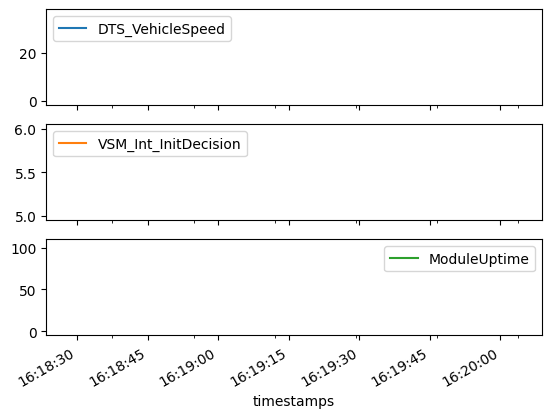

In [13]:
mdf1_filt_df.plot(subplots=True, kind = 'line')


TypeError: 'value' must be an instance of str or bytes, not a float

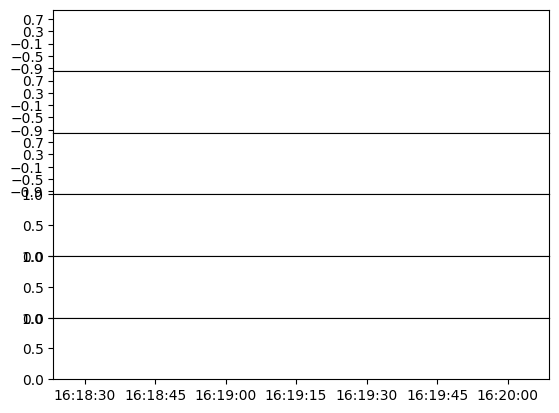

In [14]:
# import matplotlib.pyplot as plt
# import numpy as np

# # mdf1_filt_df
# fig, axs = plt.subplots(mdf1_filt_df.shape[1], 1, sharex=True)
# # Remove vertical space between Axes
# fig.subplots_adjust(hspace=0)
# for idx,col in enumerate(mdf1_filt_df.columns):
# # Plot each graph, and manually set the y tick values
#     # mdf1_filt_df[col].plot(ax=axs[idx])
#     axs[idx].plot(mdf1_filt_df.index, mdf1_filt_df[col])
#     axs[idx].set_yticks(np.arange(-0.9, 1.0, 0.4))
#     axs[idx].set_ylim(-1, 1)

# # axs[1].plot(t, s2)
# # axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
# # axs[1].set_ylim(0, 1)

# # axs[2].plot(t, s3)
# # axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
# # axs[2].set_ylim(-1, 1)

# plt.show()

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=mdf1_filt_df.shape[1]+1, cols=1, shared_xaxes=True,subplot_titles=mdf1_filt_df.columns)

for idx,col in enumerate(mdf1_filt_df.columns,1):
# Plot each graph, and manually set the y tick values
    # mdf1_filt_df[col].plot(ax=axs[idx])
    sig = mdf1_filt_df[col].dropna()
    fig.add_trace(
            go.Scatter(x=sig.index,y=sig.values, mode='markers+lines', name=col,opacity=1),
            row=idx, col=1
        )
# Update layout
fig.update_layout(
    title="Vehicle main states",
    height=1600,
    showlegend=False,  # Hide legend for clarity
)
fig.show()


In [17]:
# from asammdf.gui import plot
# import sys
# # from PySide6.QtWidgets import QApplication

# sigs_sel_list=[val for k,val in sigs_sel.items()]
# # QApplication(sys.argv)
# # QApplication.shutdown()
# # QApplication.shutdown()
# plot.plot(sigs_sel_list)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

TypeError: must be real number, not str

ValueError: could not convert string to float: ''

: 

In [ ]:
fout_pat_csv=os.path.join(fpath,fname+'_extr'+'.csv');

mdf1_filtered.export(fmt='csv',filename=fout_pat_csv,single_time_base=True,time_as_date =True)
fout_pat_csv=os.path.join(fpath,fname+'_extr_df'+'.csv');

mdf1_filt_df.to_csv(fout_pat_csv)

'C:\\d\\Downloads\\CNTRSW-19855\\Logging_2024-11-11_16-18-29_van_XL_gs_perr_extr.csv'

asammdf - INFO - Writing csv export to file "C:\d\Downloads\CNTRSW-19855\Logging_2024-11-11_16-18-29_van_XL_gs_perr_extr.csv"


'C:\\d\\Downloads\\CNTRSW-19855\\Logging_2024-11-11_16-18-29_van_XL_gs_perr_extr_df.csv'